In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a clean visualization style
sns.set(style="whitegrid")

In [3]:
# Sample data simulating an inventory system
inventory_data = pd.DataFrame({
    'product_id': ['P001', 'P002', 'P003', 'P004', 'P005'],
    'category': ['Electronics', 'Groceries', 'Electronics', 'Clothing', 'Clothing'],
    'stock_level': [10, 200, 5, 0, 50],
    'last_restock_date': ['2025-07-01', '2025-06-20', '2025-07-15', '2025-07-10', '2025-06-25'],
    'sales_last_30_days': [30, 50, 2, 0, 10],
    'supplier_lead_time': [5, 3, 10, 7, 14],
    'unit_cost': [100.0, 2.0, 150.0, 30.0, 25.0]
})

In [4]:
# Convert date column to datetime format
inventory_data['last_restock_date'] = pd.to_datetime(inventory_data['last_restock_date'], errors='coerce')

In [8]:
# ----------------------- Function Definitions -----------------------

def validate_inventory_data(df):
    """
    Validate inventory data by checking column existence, 
    handling nulls, and correcting data types.
    
    Args:
        df (pd.DataFrame): Raw inventory data.

    Returns:
        pd.DataFrame: Cleaned inventory data.
    """
    required_columns = {
        'product_id', 'category', 'stock_level', 'last_restock_date',
        'sales_last_30_days', 'supplier_lead_time', 'unit_cost'
    }

    # Ensure all required columns exist
    missing_cols = required_columns - set(df.columns)
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")

    # Fill missing numeric values
    df['stock_level'].fillna(0, inplace=True)
    df['sales_last_30_days'].fillna(0, inplace=True)
    df['supplier_lead_time'].fillna(df['supplier_lead_time'].median(), inplace=True)
    df['unit_cost'].fillna(df['unit_cost'].median(), inplace=True)

    # Handle date parsing and fill missing dates
    df['last_restock_date'] = pd.to_datetime(df['last_restock_date'], errors='coerce')
    df['last_restock_date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

    return df


In [11]:
def calculate_inventory_turnover(df):
    """
    Calculate inventory turnover rate for each product.

    Formula:
        turnover = sales_last_30_days / stock_level

    Parameters:
        df (pd.DataFrame): Inventory dataset.

    Returns:
        pd.DataFrame: DataFrame with new column 'inventory_turnover'.
    """
    df['inventory_turnover'] = df['sales_last_30_days'] / df['stock_level'].replace(0, np.nan)
    df['inventory_turnover'].fillna(0, inplace=True)  # Avoid divide-by-zero
    return df


def flag_slow_movers(df, threshold=0.5):
    """
    Identify slow-moving products.

    A slow mover is defined as a product with an inventory turnover 
    below a defined threshold.

    Parameters:
        df (pd.DataFrame): Inventory dataset.
        threshold (float): Turnover rate threshold.

    Returns:
        pd.DataFrame: DataFrame with 'is_slow_mover' boolean column.
    """
    df['is_slow_mover'] = df['inventory_turnover'] < threshold
    return df

def predict_stockouts(df):
    """
    Predict potential stockouts based on estimated stock days remaining.

    Formula:
        daily_sales = sales_last_30_days / 30
        estimated_days_remaining = stock_level / daily_sales

    Compares estimated_days_remaining with supplier_lead_time to assess risk.

    Parameters:
        df (pd.DataFrame): Inventory dataset.

    Returns:
        pd.DataFrame: DataFrame with 'stockout_risk' boolean column.
    """
    df['daily_sales'] = df['sales_last_30_days'] / 30
    df['estimated_days_remaining'] = df['stock_level'] / df['daily_sales'].replace(0, np.nan)
    df['estimated_days_remaining'].fillna(np.inf, inplace=True)
    df['stockout_risk'] = df['estimated_days_remaining'] < df['supplier_lead_time']
    return df
def plot_inventory_turnover(df):
    """
    Visualize inventory turnover distribution as a histogram.

    Parameters:
        df (pd.DataFrame): Inventory dataset.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df['inventory_turnover'], bins=10, kde=True)
    plt.title("Inventory Turnover Distribution")
    plt.xlabel("Inventory Turnover Rate")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


def plot_slow_movers(df):
    """
    Bar plot of slow-moving products.

    Parameters:
        df (pd.DataFrame): Inventory dataset.
    """
    plt.figure(figsize=(10, 5))
    slow_df = df[df['is_slow_mover']]
    sns.barplot(data=slow_df, x='product_id', y='inventory_turnover', hue='category')
    plt.title("Slow Moving Items")
    plt.ylabel("Inventory Turnover")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_stockout_risk(df):
    """
    Bar plot of products at risk of stockout.

    Parameters:
        df (pd.DataFrame): Inventory dataset.
    """
    plt.figure(figsize=(10, 5))
    risk_df = df[df['stockout_risk']]
    sns.barplot(data=risk_df, x='product_id', y='estimated_days_remaining', hue='category')
    plt.title("Stockout Risk Items")
    plt.ylabel("Estimated Days of Stock Remaining")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\sushm\AppData\Local\Temp\ipykernel_25680\3767679426.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stock_level'].fillna(0, inplace=True)
C:\Users\sushm\AppData\Local\Temp\ipykernel_25680\3767679426.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,


✅ Inventory Summary:
  product_id  inventory_turnover  is_slow_mover  estimated_days_remaining  \
0       P001                3.00          False                      10.0   
1       P002                0.25           True                     120.0   
2       P003                0.40           True                      75.0   
3       P004                0.00           True                       inf   
4       P005                0.20           True                     150.0   

   stockout_risk  
0          False  
1          False  
2          False  
3          False  
4          False  


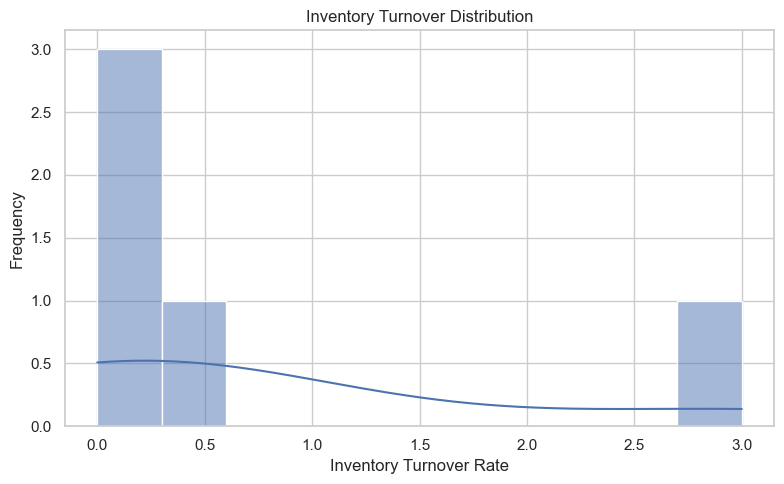

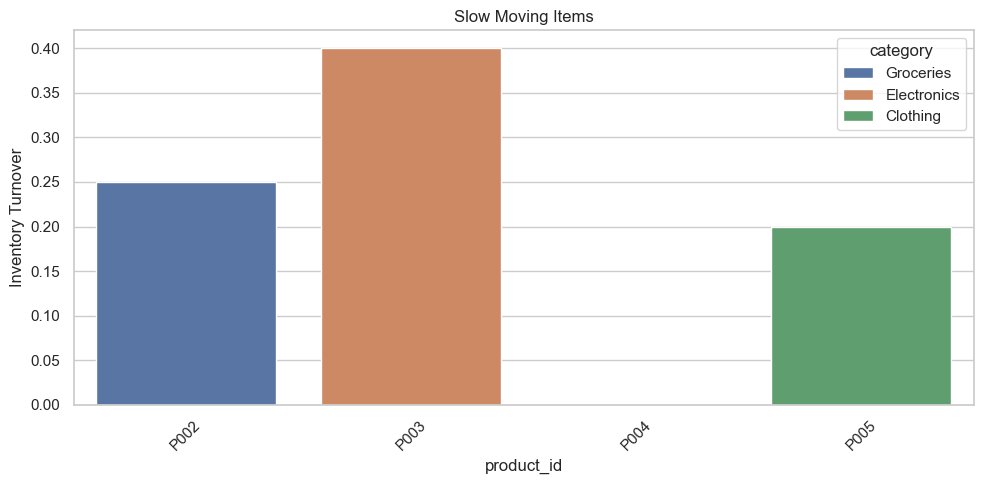

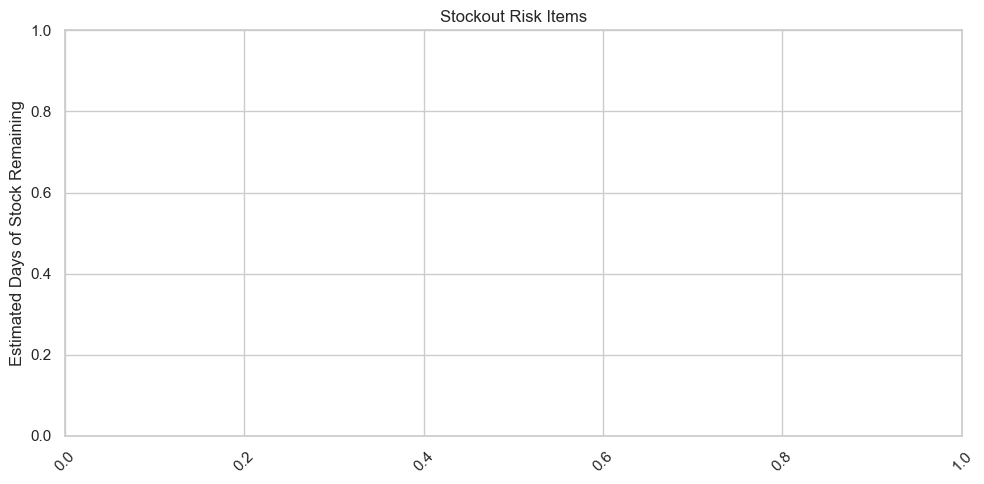

In [12]:
# ----------------------- Main Program -----------------------

if __name__ == "__main__":
    # Step 1: Clean and validate
    df = validate_inventory_data(inventory_data)

    # Step 2: Calculate metrics
    df = calculate_inventory_turnover(df)
    df = flag_slow_movers(df)
    df = predict_stockouts(df)

    # Step 3: Print summary
    print("\n✅ Inventory Summary:")
    print(df[['product_id', 'inventory_turnover', 'is_slow_mover',
              'estimated_days_remaining', 'stockout_risk']])

    # Step 4: Show visualizations
    plot_inventory_turnover(df)
    plot_slow_movers(df)
    plot_stockout_risk(df)